Connect to Gdrive

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [165]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

In [166]:
data=pd.read_csv('/content/drive/MyDrive/TA/dataset/Jakut.csv',parse_dates=True)
data  = data.rename(columns={'Tanggal':'Date','Tavg':'Temperature','RH_avg':'Humidity','ff_avg':'Wind','RR':'Rainfall'})
data = data[1:100]
data = data['Temperature']
data = data.replace('',math.nan)
data = data.replace(8888.0,math.nan)
data = data.replace(0.0,math.nan)
data = data.fillna(data.mean())
data = pd.DataFrame(data)

In [167]:
data

Temperature
1          26.4
2          26.4
3          25.6
4          27.7
5          28.5
..          ...
95         29.3
96         28.8
97         27.6
98         27.8
99         29.3

[99 rows x 1 columns]

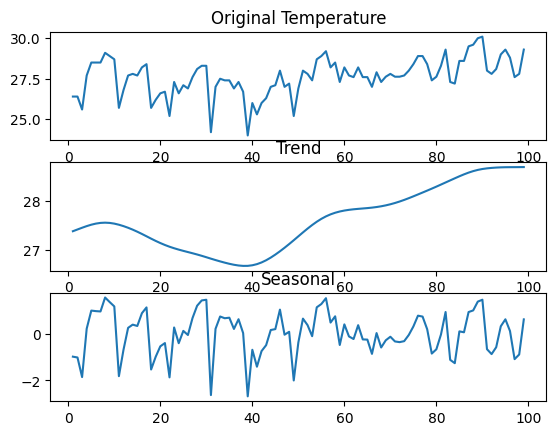

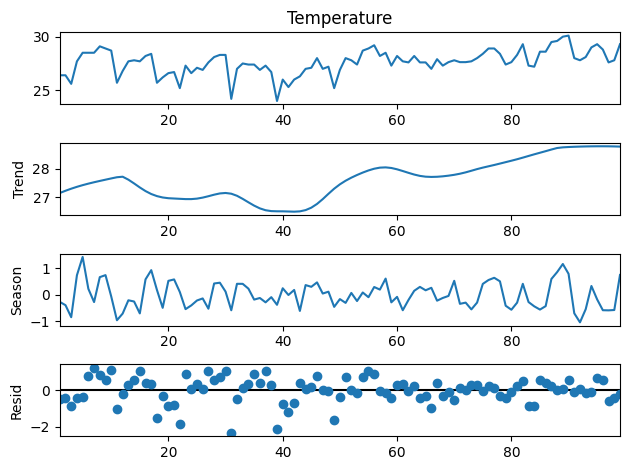

In [168]:
#split data 
train_size = int(len(data) * 0.80)
train_data, test_data = data[0:train_size], data[train_size:len(data)]

#decompose data into 
from statsmodels.tsa.seasonal import STL
series = data['Temperature']

cycle, trend = sm.tsa.filters.hpfilter(series, lamb=1600)
fig , ax = plt.subplots(3,1)
ax[0].plot (series)
ax[0].set_title('Original Temperature')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Seasonal')
plt.show()

#show residual from stl
stl = STL(series, period = 12).fit()
result = stl.plot()
plt.show()

RMSE: 0.824
MAPE: 0.021
MAE: 0.588
R2: -0.019


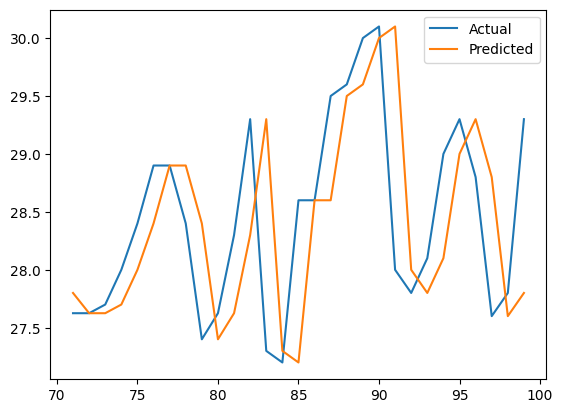

In [169]:

#create Prediction model
prediction = series.shift(1).dropna()

#calculate Error
rmse = np.sqrt(mean_squared_error(series[int(len(series) * 0.7)+1:], prediction.iloc[int(len(series) * 0.7):]))
mape = mean_absolute_percentage_error(series[int(len(series) * 0.7)+1:], prediction.iloc[int(len(series) * 0.7):])
mae = mean_absolute_error(series[int(len(series) * 0.7)+1:], prediction.iloc[int(len(series) * 0.7):])
r2 = r2_score(series[int(len(series) * 0.7)+1:], prediction.iloc[int(len(series) * 0.7):])

print('RMSE: %.3f' % rmse)
print('MAPE: %.3f' % mape)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

#plot prediction
plt.plot(series[int(len(series) * 0.7)+1:])
plt.plot(prediction.iloc[int(len(series) * 0.7):])
plt.legend(['Actual','Predicted'])
plt.show()

STL Forecast

In [170]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

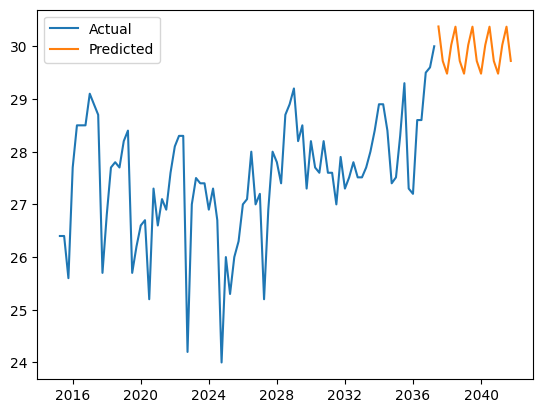

RMSE: 1.806
MAPE: 0.056
MSE: 3.262
MAE: 1.551
R2: -3.703


In [171]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

data=pd.read_csv('/content/drive/MyDrive/TA/dataset/Jakut.csv')
data  = data.rename(columns={'Tanggal':'Date','Tavg':'Temperature','RH_avg':'Humidity','ff_avg':'Wind','RR':'Rainfall'})
data = data[1:90]
data = data[['Date','Temperature']]
data = data.replace('',math.nan)
data = data.replace(8888.0,math.nan)
data = data.replace(0.0,math.nan)
data = data.fillna(data.mean(numeric_only=True))
data = pd.DataFrame(data)

date = data['Date']
base_date = date[1]
temp = data['Temperature']

#split data for training and test
train_size = int(len(temp) * 0.80)
train_data, test_data = temp[0:train_size], temp[train_size:len(temp)]

#set date.index freq info
data.index = pd.date_range(base_date, periods=date.shape[0], freq="QS")

#create forecasts model
stlf = STLForecast(data['Temperature'], ARIMA, model_kwargs={"order": (2, 1, 0)})
res = stlf.fit()
forecasts = res.forecast(18)

#flot forecasts
plt.plot(data['Temperature'])
plt.plot(forecasts)
plt.legend(['Actual','Predicted'])
plt.show()

#calculate Error
rmse = np.sqrt(mean_squared_error(test_data, forecasts))
mape = mean_absolute_percentage_error(test_data, forecasts)
mse = mean_squared_error(test_data, forecasts)
mae = mean_absolute_error(test_data, forecasts)
r2 = r2_score(test_data, forecasts)

print('RMSE: %.3f' % rmse)
print('MAPE: %.3f' % mape)
print('MSE: %.3f' % mse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)
